In [2]:
import random
import math
import numpy as np
from scipy import spatial

from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 7)

# Generate a sample dataset

### Noisy sample of a circle.

In [12]:
N = 100        # Number of sample points
r = 10.        # Radius of larger circle
epsilon = 2.   # Radius of noise

# Matrix to hold points
sample = np.zeros((N,2))

for n in range(N):
    theta_big = random.uniform(0, 2.*math.pi)
    theta_small = random.uniform(0, 2.*math.pi)
    
    sample[n,:] = r*np.asarray([math.sin(theta_big), math.cos(theta_big)]) + \
                  epsilon*np.asarray([math.sin(theta_small), math.cos(theta_small)])


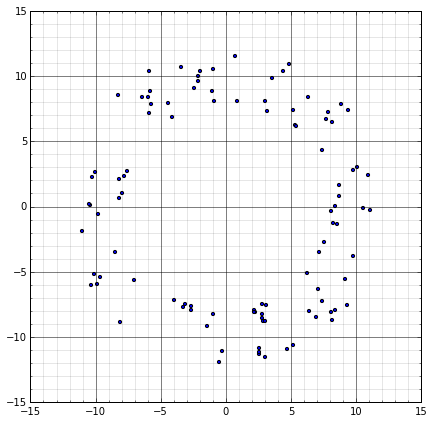

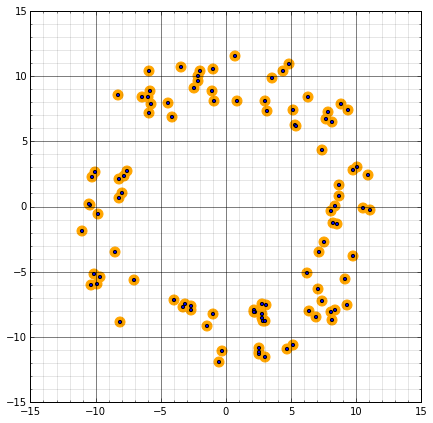

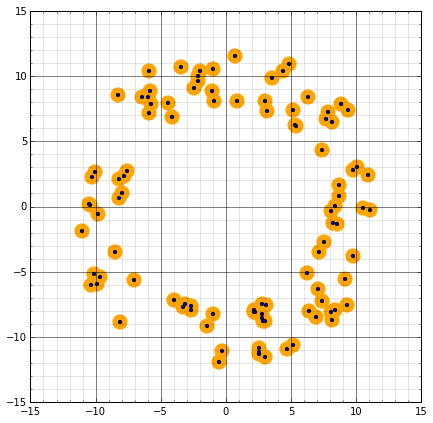

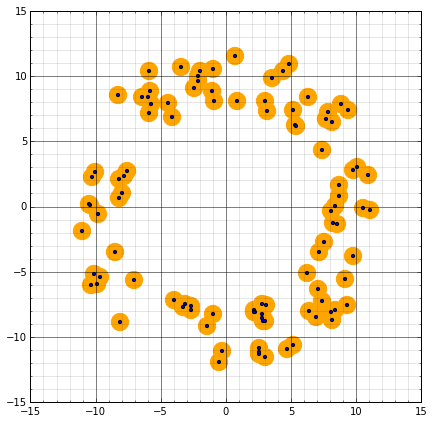

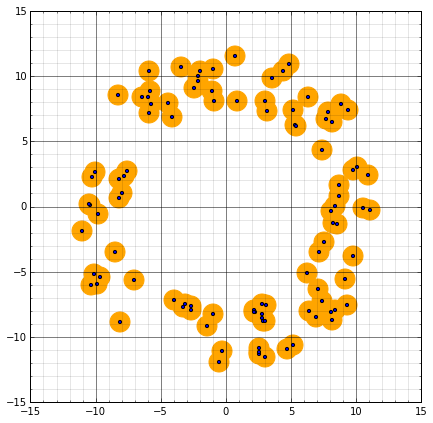

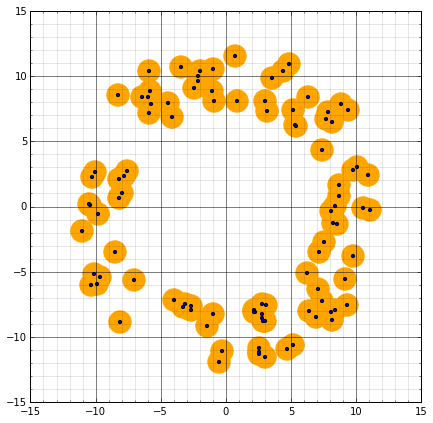

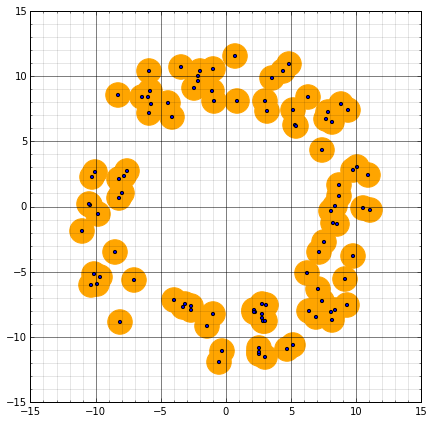

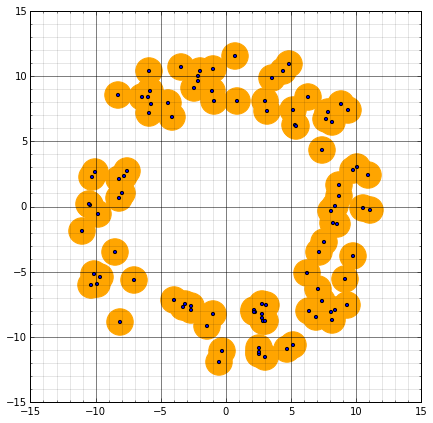

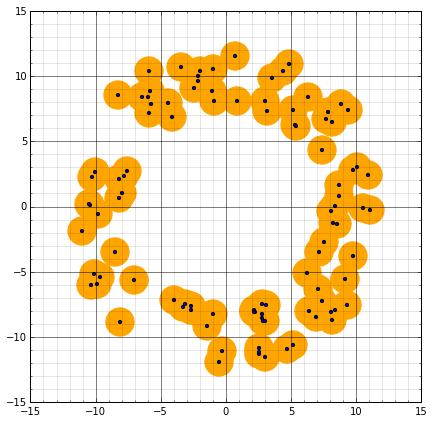

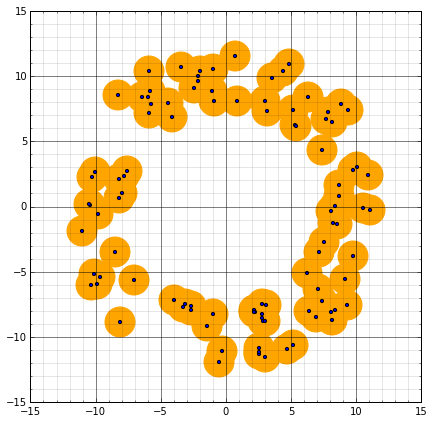

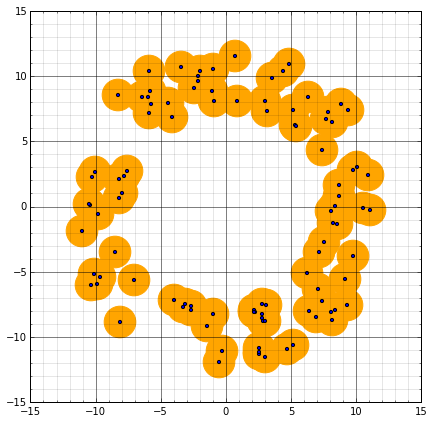

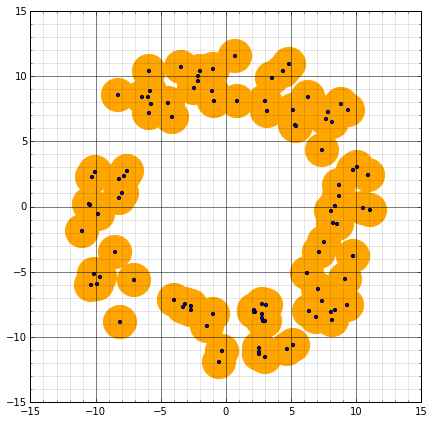

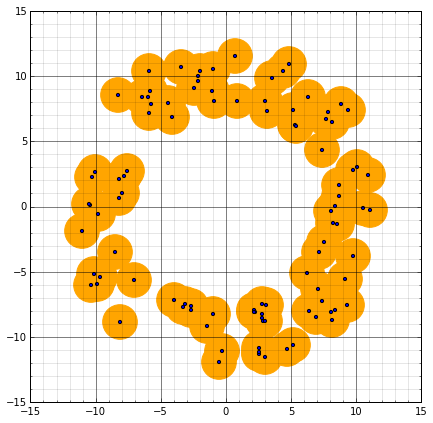

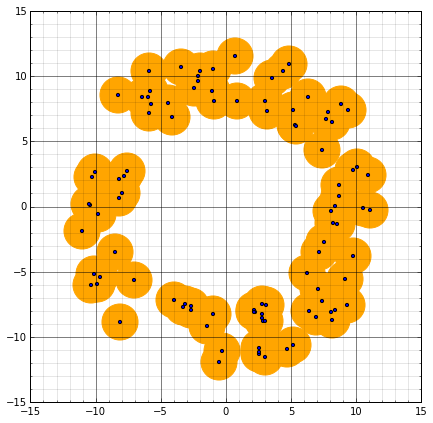

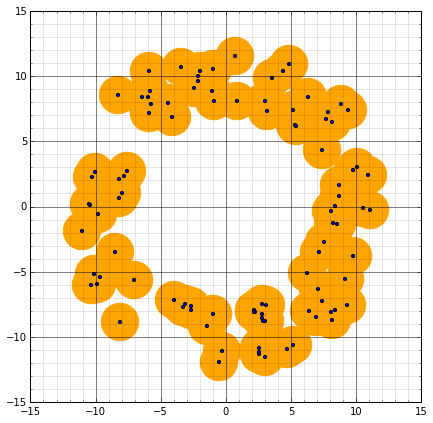

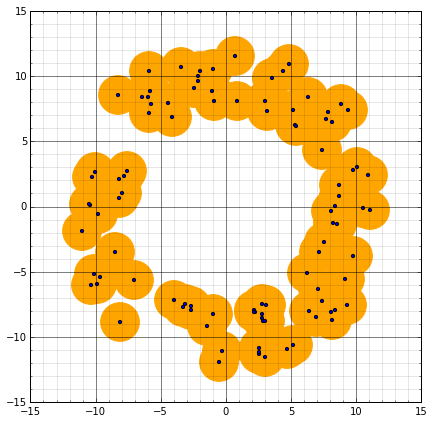

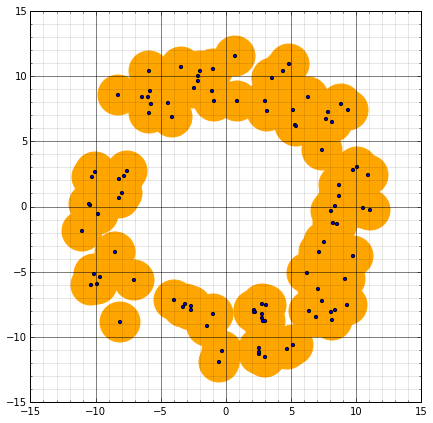

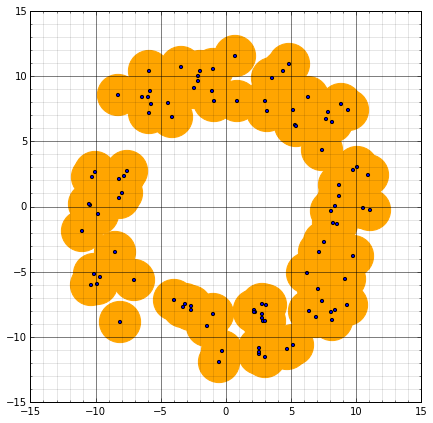

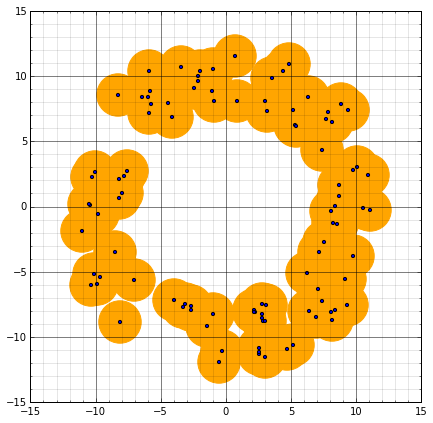

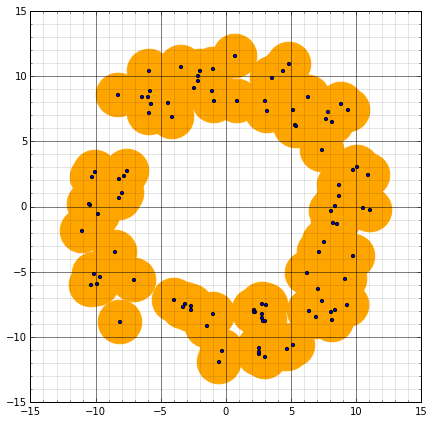

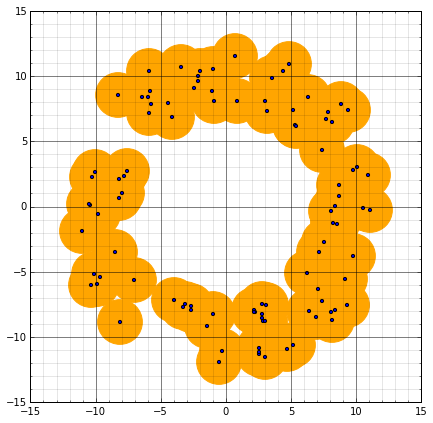

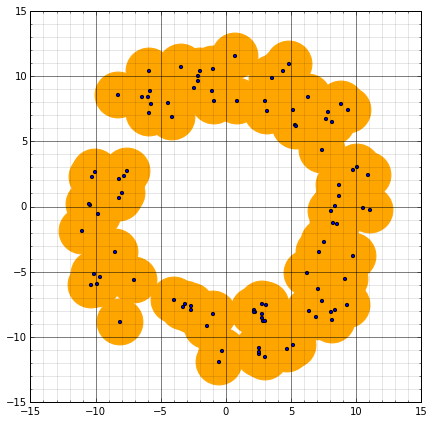

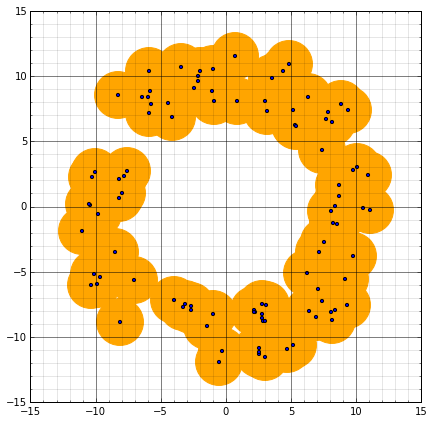

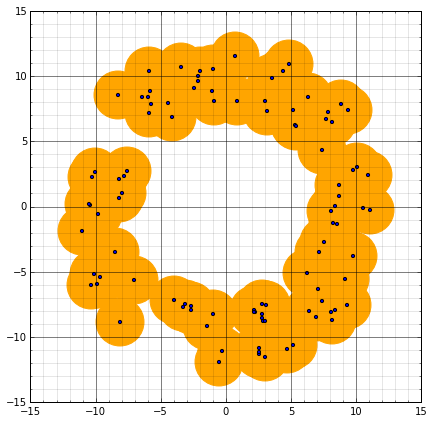

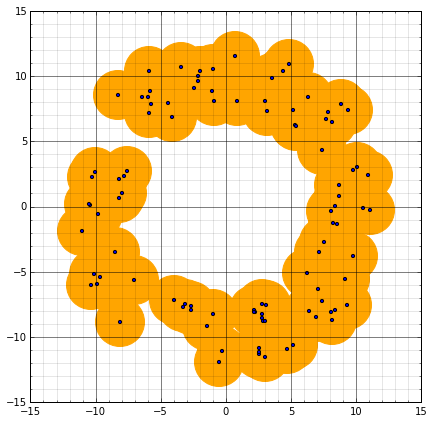

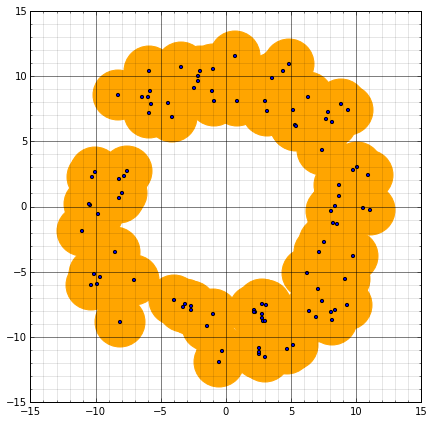

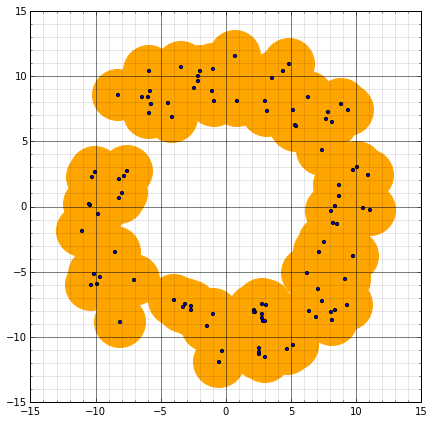

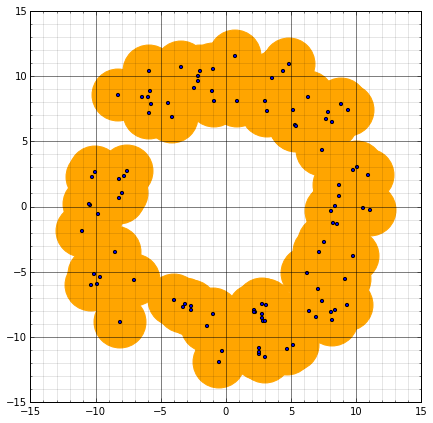

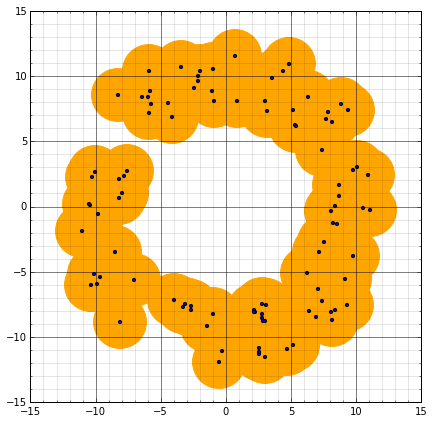

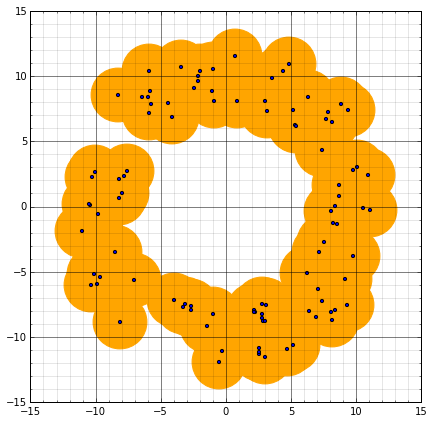

In [13]:
for size in range(0, 3000, 100):

    f = plt.figure()
    ax = plt.gca()
    
    plt.grid(b=True, which='major', color='k', linestyle='-')
    plt.grid(b=True, which='minor', color='k', linestyle='-', alpha=0.2)

    # Transparent "balls" of larger radius
    plt.scatter(sample[:,0], sample[:,1], s=size, color='orange');

    # actual points
    plt.scatter(sample[:,0], sample[:,1], s=10);

    ax.set_aspect('equal')
    
    plt.minorticks_on()

    plt.show()

# Generate the Distance Matrix of the Point Cloud

In [14]:
dist_mat = spatial.distance.pdist(sample)
dist_mat = spatial.distance.squareform(dist_mat)

### Plot the distance matrix

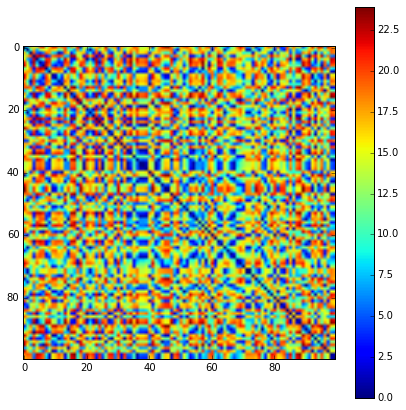

In [15]:
plt.imshow(dist_mat);
plt.colorbar();

### Save as a space-delimited text file

In [16]:
np.savetxt('noisy_sample_of_circle.txt', dist_mat, delimiter=' ')

# Run Eirene on the distance matrix

Use the JuliaNotebook to run the distance matrix through Eirene and output the persistence data...

# Import the persistence diagram data and process for plotting

From JuliaNotebook.ipynb, run the code that outputs the persistence diagram info and then run the following code.

In [3]:
persistence_data_finite = {}   # For the finite persistence points
persistence_data_infinite = {} # For the infinite persistence points

# Keep track of the maximum value in the text files for plotting later
max_val = 0

for d in range(2):
    raw_data = np.loadtxt('output_dim_%d.txt' % d)
    
    if len(raw_data.shape) > 1:    # Check to see if file has more than one row
        persistence_data_infinite[d] = raw_data[np.isinf(raw_data[:,1]), 0]
        persistence_data_finite[d] = raw_data[np.invert(np.isinf(raw_data[:,1])), :]
    else:                          # Otherwise parse it slightly differently
        if np.isinf(raw_data[1]):
            persistence_data_infinite[d] = np.asarray([raw_data[0]])
            persistence_data_finite[d] = []
        else:
            persistence_data_finite[d] = np.reshape(raw_data, (1,2))
            persistence_data_infinite[d] = []
    
    if not np.array_equal(persistence_data_infinite[d], []):
        max_val = max(max_val, np.amax(persistence_data_infinite[d].flatten()))
    if not np.array_equal(persistence_data_finite[d], []):
        max_val = max(max_val, np.amax(persistence_data_finite[d].flatten()))


### Plot the persistence data

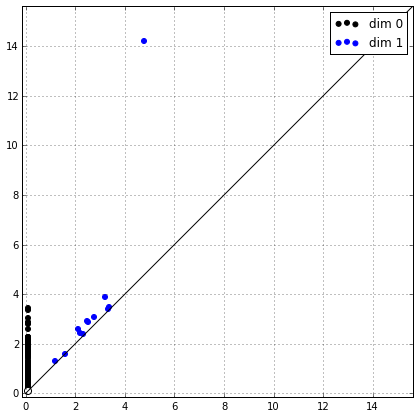

In [5]:
plt.rcParams['figure.figsize'] = (7, 7)

colors = ['black', 'blue']
labels = ['dim 0', 'dim 1']
size = 25

f = plt.figure()
ax = plt.gca()

plt.plot([0,max_val*1.1], [0,max_val*1.1], color='black')

for d in range(2):
    
    # Plot finite persistence points
    plt.scatter(persistence_data_finite[d][:,0], persistence_data_finite[d][:,1], 
                color=colors[d], 
                label=labels[d], 
                s=size)
    
    # Plot infinite persistence points along diagonal
    plt.scatter(persistence_data_infinite[d], persistence_data_infinite[d], 
                color='white', 
                edgecolors=colors[d], 
                s=size*2.)

plt.axis('equal')
plt.grid()
plt.xlim(-max_val/100.,max_val*1.1) # Give a little bit of space for all of the points
plt.ylim(-max_val/100.,max_val*1.1)

plt.legend()
plt.show()    


# Import the Eirene JSON output and plot all of the things with Bokeh

From JuliaNotebook.ipynb, run the code that outputs the JSON version of the Eirene output and then run the following code.